In [47]:
################################  Storage_Optimization.ipynb  ####################################
# Author: Sukhendu Sain
# Description: Main file of codebase. Houses main code
# Data: 23-Nov-2024
#################################################################################

In [48]:
# Import Necessary Libraries, Utils, and Config Files
import utils
from config import *
import pandas as pd
import os
import matplotlib.pyplot as plt
# import importlib
# importlib.reload(utils)

### Config - Parameters/Other Variables/File Paths

In [49]:
## Files Path ##
ROOT_FILE_PATH = '\\'.join(os.getcwd().split('\\')[:-1])

AKINS_FOMO_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\AKINS FoMoCo_Piece_Sales_112222_YTD.xlsx")
GPARTS_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\GPARTS Part Measures.xlsx")
WHOLESALE_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\Wholesale JAN_Oct_Parts_Ranking_Counter_Invoices_All_Brands.xlsx")
SERVICE_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\Service JAN_Oct_Parts_Ranking_ROs_All_Brands.xlsx")
COUNTERPAD_FILE_PATH = os.path.join(ROOT_FILE_PATH, r"Data&Files\Counter_Pad_11142024.xlsx")



## Variables
print_df_after_import = False
print_df_data_analyse = False

# Data Import and Clean

In [50]:
#### Read FILE:: (AKINS FoMoCo_Piece_Sales_112222_YTD.xlsx) into Dataframe
df_Akins = utils.read_excel(AKINS_FOMO_FILE_PATH)
if print_df_after_import: utils.print_df(df_Akins) # Print the Dataframe

In [ ]:
#### Read FILE:: (GPARTS Part Measures.xlsx) into Dataframe
df_Gparts = utils.read_excel(GPARTS_FILE_PATH)
if print_df_after_import: utils.print_df(df_Gparts) # Print the Dataframe

In [41]:
#### Read FILE:: (Wholesale JAN_Oct_Parts_Ranking_Counter_Invoices_All_Brands.xlsx) into Dataframe
df_Wholesale = utils.read_excel(WHOLESALE_FILE_PATH)

# Clean the Wholesale Dataframe
df_Wholesale = df_Wholesale.drop(columns=[col for col in df_Wholesale.columns if 'Unnamed' in col], inplace=False)
df_Wholesale_Ford = df_Wholesale[df_Wholesale['Vendor'] == 'FOR'] # Put only 'Ford' Brand Data into another DF

if print_df_after_import: utils.print_df(df_Wholesale_Ford) # Print the Dataframe

In [42]:
#### Read FILE:: (Service JAN_Oct_Parts_Ranking_ROs_All_Brands.xlsx) into Dataframe
df_Service = utils.read_excel(SERVICE_FILE_PATH)

# Clean the Service Dataframe
df_Service = df_Service.drop(columns=[col for col in df_Service.columns if 'Unnamed' in col], inplace=False)
df_Service_Ford = df_Service[df_Service['Vendor'] == 'FOR'] # Put only 'Ford' Brand Data into another DF

if print_df_after_import: utils.print_df(df_Service_Ford, 100) # Print the Dataframe

In [43]:
df_CounterPad = utils.read_excel(COUNTERPAD_FILE_PATH)
data = df_CounterPad.iloc[0,0]

# Split the data into lines
lines = data.strip().split('\n')

# Create a list to store the parsed data
parsed_data = []

# Parse each line
for line in lines:
    # Split the line into columns
    columns = line.split()
    
    # Extract the data
    mfg = columns[0]
    src = columns[1]
    cost = float(columns[2].replace(',', ''))
    list_price = float(columns[3].replace(',', ''))
    bin = columns[4]
    part_number = columns[5]
    oh = float(columns[-1])
    
    # Extract the description (all columns between part_number and OH)
    description = ' '.join(columns[6:-1])
    
    # Add the parsed data to the list
    parsed_data.append({
        'Mfg': mfg,
        'Src': src,
        'Cost': cost,
        'List': list_price,
        'Bin': bin,
        'Part Number': part_number,
        'Description': description,
        'OH': oh
    })

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(parsed_data)

# Print the DataFrame
if print_df_after_import: utils.print_df(df, 100)

# Data Analysis


In [52]:
## Find Number of Matching Part Numbers in each of the Dataframe

# The Dataframes to match
all_dfs = [df_Wholesale_Ford, df_Gparts]

# Part# Column Name of each DF
part_number_columns = ['Part Number', 'Svc Part Number']

# Find common part numbers
common_part_numbers = set(all_dfs[0][part_number_columns[0]])
for i in range(1, len(all_dfs)):
    common_part_numbers &= set(all_dfs[i][part_number_columns[i]])

print(f"Part numbers common to all DataFrames: {len(common_part_numbers)}")
if print_df_data_analyse: utils.print_df(df_Wholesale_Ford[df_Wholesale_Ford["Part Number"].isin(common_part_numbers)], 100)

Part numbers common to all DataFrames: 20763


In [59]:
## Find Rows with 0 in either Dimensions
# Depth (Column Here) = Length (In Docs)

# Count no. of Rows with 0 in either Dimensions; no_all share count with other 3
no_depth = df_Gparts[df_Gparts["Prod Att - Length"] == 0].shape[0]
no_width = df_Gparts[df_Gparts["Prod Att- Width"] == 0].shape[0]
no_height = df_Gparts[df_Gparts["Prod Att - Height"] == 0].shape[0]
no_all = df_Gparts[(df_Gparts["Prod Att - Height"] == 0) & (df_Gparts["Prod Att- Width"] == 0) & (df_Gparts["Prod Att - Length"] == 0)].shape[0]

# Calculate percentages
total_rows = df_Gparts.shape[0]
percent_no_depth = (no_depth / total_rows) * 100
percent_no_width = (no_width / total_rows) * 100
percent_no_height = (no_height / total_rows) * 100
percent_no_all = (no_all / total_rows) * 100

# Print the Counts/Percentages
print(f"No Length/Depth: {no_depth}; No Width: {no_width}; No Height: {no_height}; No All: {no_all};") 
print(f"No Length/Depth: {percent_no_depth}; No Width: {percent_no_depth}; No Height: {percent_no_height}; No All: {percent_no_all};") 

# Here we find out that a row, if containing 0 in 1 dimension, has 0 in all, or
# A row has either all or none dimensions

No Length/Depth: 38294; No Width: 38294; No Height: 38294; No All: 38294;
No Length/Depth: 16.49572465484934; No Width: 16.49572465484934; No Height: 16.49572465484934; No All: 16.49572465484934;


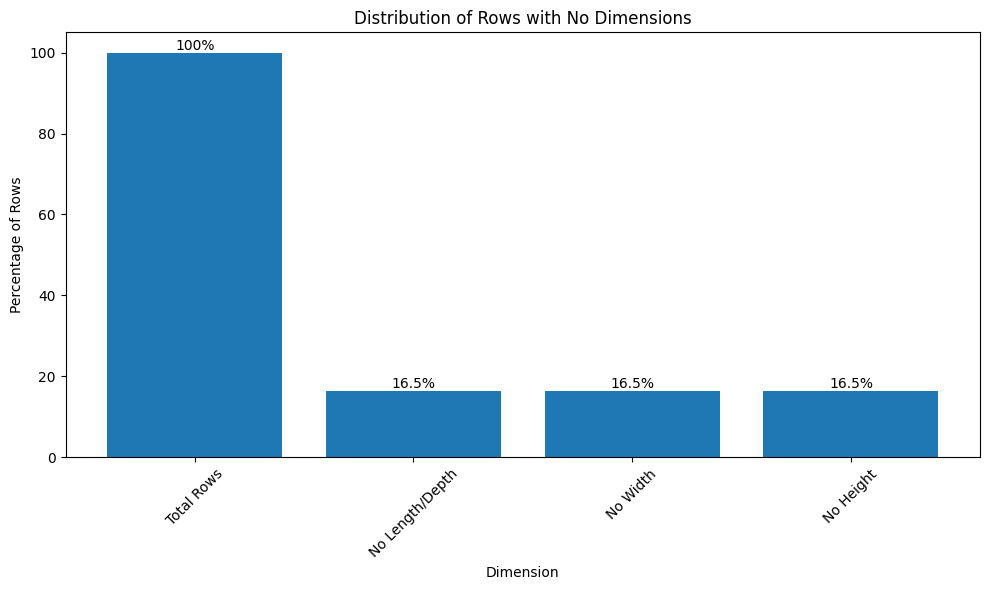

In [58]:
## Visualize above No Dimensions Data

# Create the bar graph
plt.figure(figsize=(10, 6)) 
bars = ['Total Rows', 'No Length/Depth', 'No Width', 'No Height']
heights = [100, percent_no_depth, percent_no_width, percent_no_height]

plt.bar(bars, heights)
plt.title(f'Distribution of Rows with No Dimensions')
plt.xlabel('Dimension')
plt.ylabel('Percentage of Rows')
plt.xticks(rotation=45)

# Add labels to each bar
for i, v in enumerate(heights):
    plt.text(i, v, str(round(v, 2)) + '%', ha='center', va='bottom')

# Show the legend and display the chart
plt.tight_layout()
plt.show()

# Data Processing & Calculation

In [ ]:
## Sort the 'Wholesale..' DF by 'Sort Pcs' Columns in Descending order
# Sold Pcs/Sold = Sales Frequency

df_Wholesale_Ford["Total Sold"] = df_Wholesale_Ford["Sold"] +  df_Wholesale_Ford["Sold.1"]
df_Wholesale_Ford.sort_values(['Total Sold'], ascending=False, inplace=True)

In [ ]:
df_Wholesale_Ford

In [ ]:
data = []
sum = 0
totalSoldPCs = int(df_Wholesale_Ford["Total Sold"].sum())
print(sum, totalSoldPCs)
for i in range(df_Wholesale_Ford.shape[0]):
    zone = ""
    if sum/totalSoldPCs <= 0.2:
        zone = "Red Hot Zone"
    if sum/totalSoldPCs > 0.2 and sum/totalSoldPCs <= 0.4:
        zone = "Orange Zone"
    if sum/totalSoldPCs > 0.4 and sum/totalSoldPCs <= 0.6:
        zone = "Yellow Zone"
    if sum/totalSoldPCs > 0.6 and sum/totalSoldPCs <= 0.8:
        zone = "Green Zone"
    if sum/totalSoldPCs > 0.8:
        zone = "Blue Zone"
    data.append([df_Wholesale_Ford["Part Number"].iloc[i], zone, sum])
    sum = sum + df_Wholesale_Ford["Total Sold"].iloc[i]
df_zones = pd.DataFrame(data)
utils.print_df(df_zones,None)

with open("htt.txt", "w") as f:
    f.write(df_zones.to_string())